# Data analysis

In [ ]:
!unzip /content/dataa.csv.zip -d /content/data

Archive:  /content/dataa.csv.zip
error [/content/dataa.csv.zip]:  missing 8388608 bytes in zipfile
  (attempting to process anyway)
error: invalid zip file with overlapped components (possible zip bomb)


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tweet_data=pd.read_csv('/content/train_tweet.csv')
print(tweet_data.shape)
tweet_data.head(10)

(31962, 3)


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
tweet_data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [ ]:
tweet_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

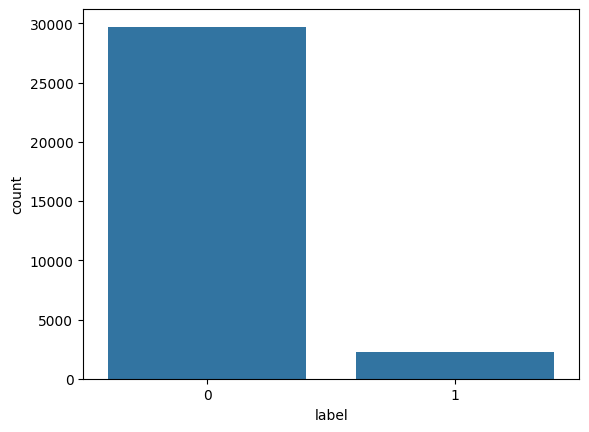

In [ ]:
sns.countplot(x=imdb_data['label'])

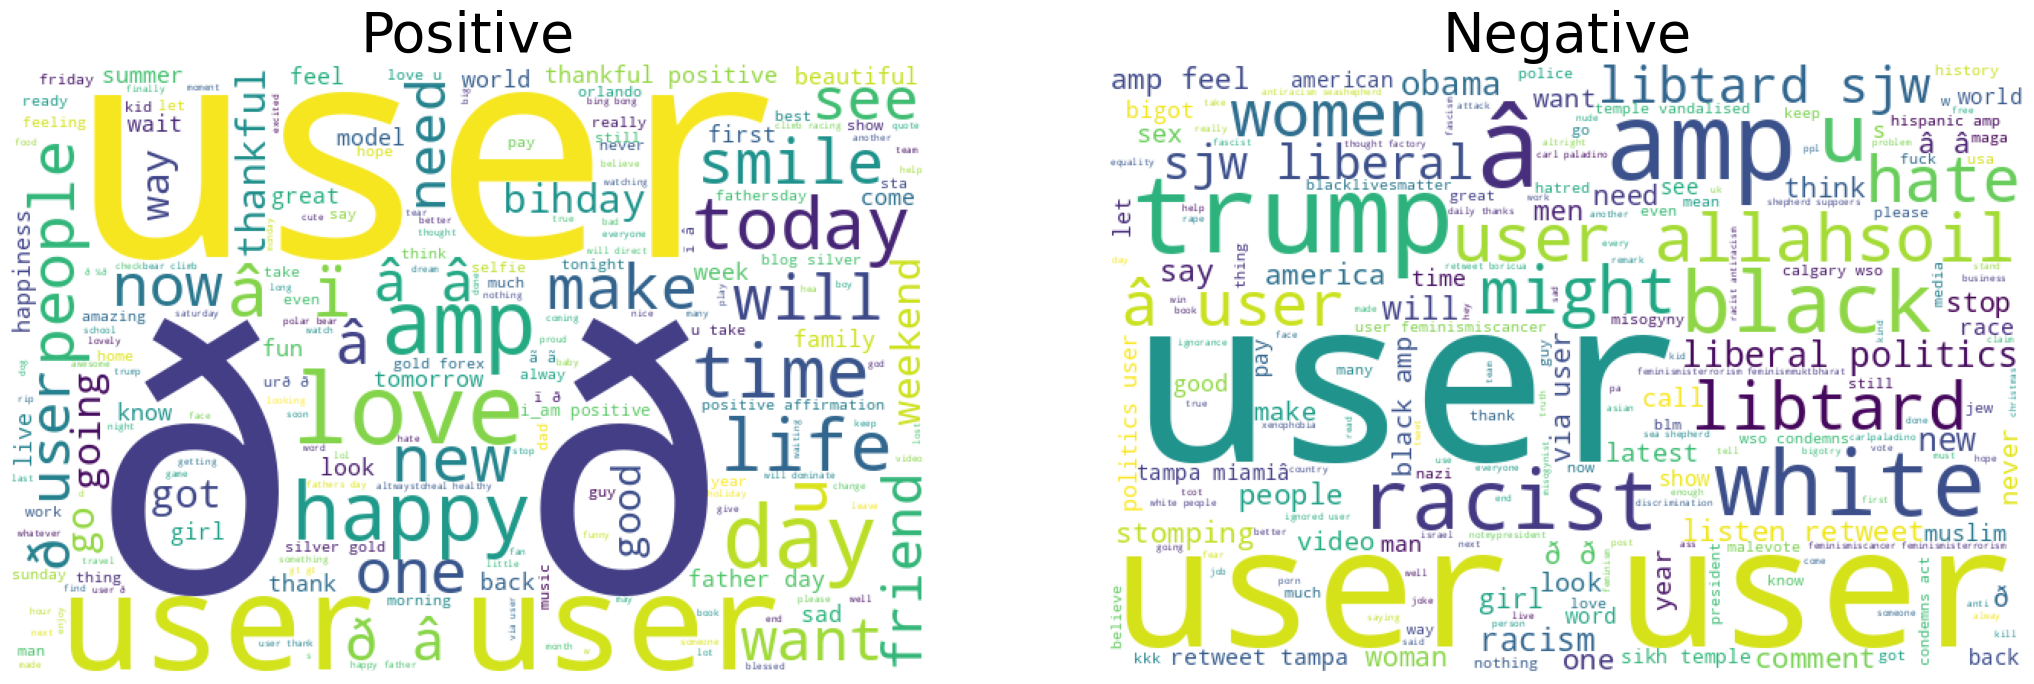

In [ ]:
def makeWordCloud(bkColor, w, h, series, title, ax):
    wcl = WordCloud(background_color=bkColor,
                    width=w,
                    height=h).generate(" ".join(series))
    ax.imshow(wcl)
    ax.axis('off')
    ax.set_title(title, fontsize=40)
positive = tweet_data[tweet_data['label']== 0]['tweet']
negative = tweet_data[tweet_data['label']== 1]['tweet']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])
makeWordCloud("white", 600, 400, positive, "Positive", ax1)
makeWordCloud("white", 600, 400, negative, "Negative", ax2)
plt.show()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

tokenizer=ToktokTokenizer()
stopword_list=nltk.corpus.stopwords.words('english')

In [ ]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
tweet_data['tweet']=tweet_data['tweet'].apply(denoise_text)

In [ ]:
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
tweet_data['tweet']=tweet_data['tweet'].apply(remove_special_characters)

### Text stemming

In [ ]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
tweet_data['tweet']=tweet_data['tweet'].apply(remove_special_characters)


### Remove stopwords

In [ ]:
stop=set(stopwords.words('english'))
print(stop)
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text
tweet_data['tweet']=tweet_data['tweet'].apply(remove_stopwords)


{'his', 'now', 'at', 'you', 'above', 'such', 'd', 'with', 'should', 'mightn', 'm', "didn't", "wouldn't", 'about', 'themselves', 'once', "shouldn't", 'while', 'all', 'very', 'because', 'more', 'wasn', 'my', 'are', 'here', 'couldn', 'what', 'in', 'few', 'those', 'when', 'own', "she's", 's', 'which', 'an', 'for', 'some', "isn't", 'weren', 'ours', 'just', 'did', 'yourselves', 'that', 'below', 'on', 'myself', "it's", "haven't", 'shan', 'ma', 'our', 'ourselves', 'who', 'any', 'the', "shan't", 'so', 'her', 'herself', "don't", 'doing', 'shouldn', 'or', 'be', 'haven', 'she', 'after', 'aren', 're', 'being', 'does', 'why', 'each', 'from', 'have', 'again', 'most', 'their', 'by', 'hadn', 'is', 'it', 'how', 'not', "mightn't", 'doesn', "needn't", 'your', "won't", 'theirs', 'same', "aren't", 'of', 'they', 'won', 'hers', 'were', "should've", 'ain', 'its', 'them', 'o', 'do', "mustn't", 'but', 'further', 'both', 'y', 'll', 'wouldn', 'a', "you're", "that'll", 'up', 'we', 'too', 'between', 'to', 'only', 'b

### Normalization and Splitting dataset

In [ ]:
tweet_data.loc[tweet_data['label']==1]

,id,label,tweet
13,14,1,user cnn calls michigan middle school build wa...
14,15,1,comment australia opkillingbay seashepherd hel...
17,18,1,retweet agree
23,24,1,user user lumpy says prove lumpy
34,35,1,unbelievable 21st century wed need something l...
...,...,...,...
31934,31935,1,lady banned kentucky mall user jcpenny kentucky
31946,31947,1,user omfg im offended im mailbox im proud mail...
31947,31948,1,user user dont balls hashtag say weasel away l...
31948,31949,1,makes ask anybody god oh thank god


In [ ]:
norm_train_reviews=tweet_data.tweet[:20000]
norm_train_reviews[0]

'user father dysfunctional selfish drags kids dysfunction run'

In [ ]:
norm_test_reviews=tweet_data.tweet[20000:]
norm_test_reviews[25005]

'crap funeral go tomorrow sucks mourning person morningperson sleepin cry wake burial'

In [ ]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train_reviews=cv.fit_transform(norm_train_reviews)
cv_test_reviews=cv.transform(norm_test_reviews)
print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (20000, 216183)
BOW_cv_test: (11962, 216183)


In [ ]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews=tv.fit_transform(norm_train_reviews)
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (20000, 216183)
Tfidf_test: (11962, 216183)


In [ ]:
lb=LabelBinarizer()
sentiment_data=lb.fit_transform(tweet_data['label'])
print(sentiment_data.shape)

(31962, 1)


In [ ]:
train_sentiments=sentiment_data[:20000]
test_sentiments=sentiment_data[20000:]
print(train_sentiments)
print(test_sentiments)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


## Machine learning Algorithms

Logistic Regression

In [ ]:
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


In [ ]:
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.9339575321852533
lr_tfidf_score : 0.9283564621300786


In [ ]:
# classification report
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.93      1.00      0.97     11105
    Negative       1.00      0.08      0.15       857

    accuracy                           0.93     11962
   macro avg       0.97      0.54      0.56     11962
weighted avg       0.94      0.93      0.91     11962

              precision    recall  f1-score   support

    Positive       0.93      1.00      0.96     11105
    Negative       0.00      0.00      0.00       857

    accuracy                           0.93     11962
   macro avg       0.46      0.50      0.48     11962
weighted avg       0.86      0.93      0.89     11962



In [ ]:
# confusion matrix
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[0,1])

print(cm_bow)
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[0,1])
print(cm_tfidf)

[[11105     0]
 [  790    67]]
[[11105     0]
 [  857     0]]


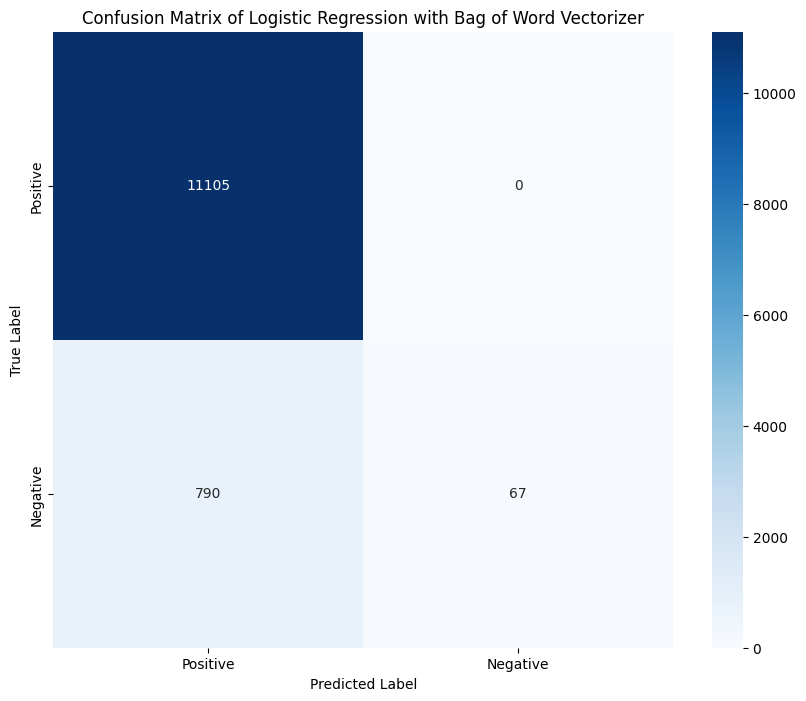

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of Logistic Regression with Bag of Word Vectorizer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

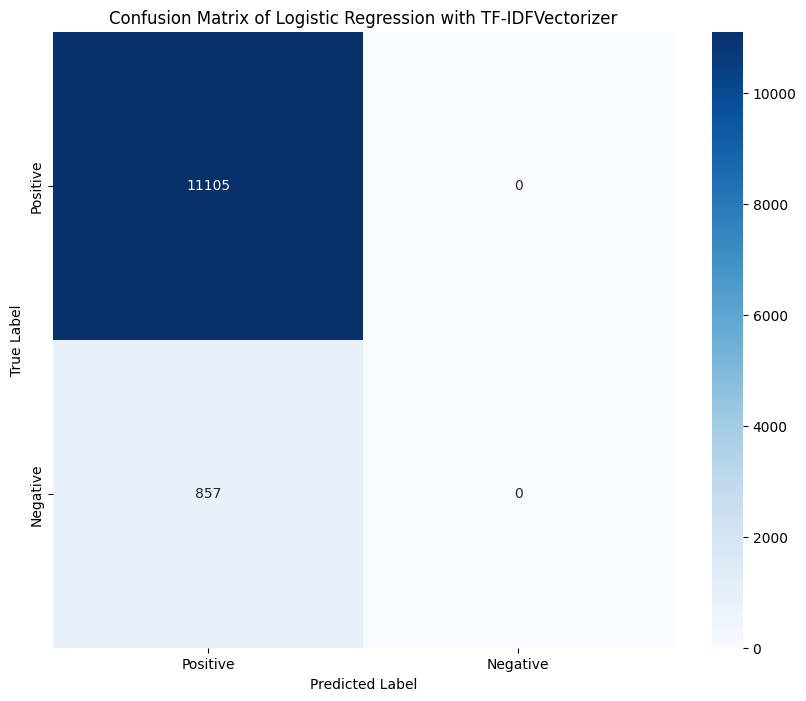

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of Logistic Regression with TF-IDFVectorizer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Multinomial Naive Bayes

In [ ]:
# with Bow vectorizer
mnb=MultinomialNB()
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments)
# with TF-IDF vectorizer
print(mnb_bow)
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments)
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


In [ ]:
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


In [ ]:
mnb_bow_predict=mnb.predict(cv_test_reviews)
mnb_tfidf_predict=mnb.predict(tv_test_reviews)

In [ ]:
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.9375522487878282
mnb_tfidf_score : 0.9283564621300786


In [ ]:
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.94      1.00      0.97     11105
    Negative       1.00      0.13      0.23       857

    accuracy                           0.94     11962
   macro avg       0.97      0.56      0.60     11962
weighted avg       0.94      0.94      0.91     11962

              precision    recall  f1-score   support

    Positive       0.93      1.00      0.96     11105
    Negative       0.00      0.00      0.00       857

    accuracy                           0.93     11962
   macro avg       0.46      0.50      0.48     11962
weighted avg       0.86      0.93      0.89     11962



In [ ]:
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[0,1])
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[0,1])

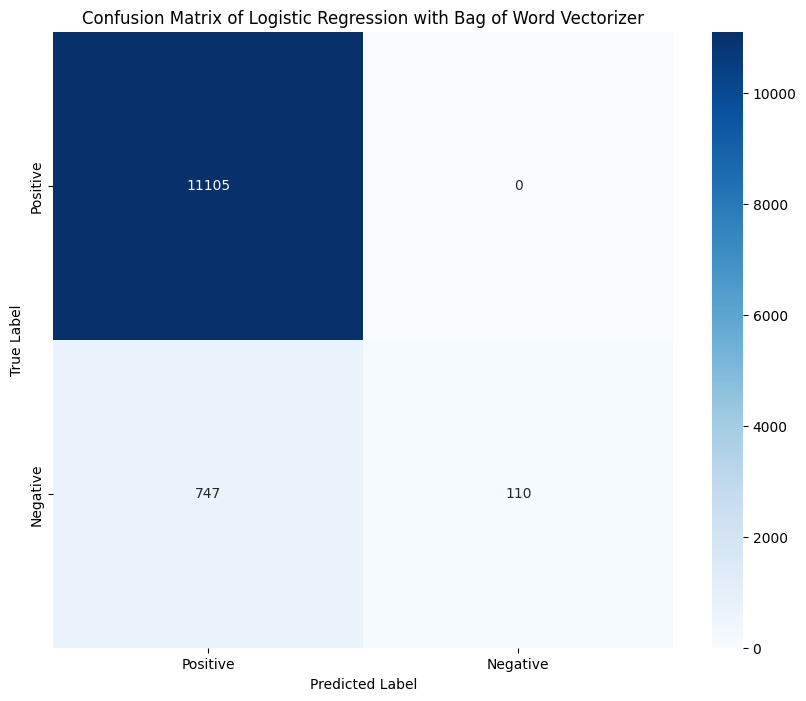

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_bow, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of Logistic Regression with Bag of Word Vectorizer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

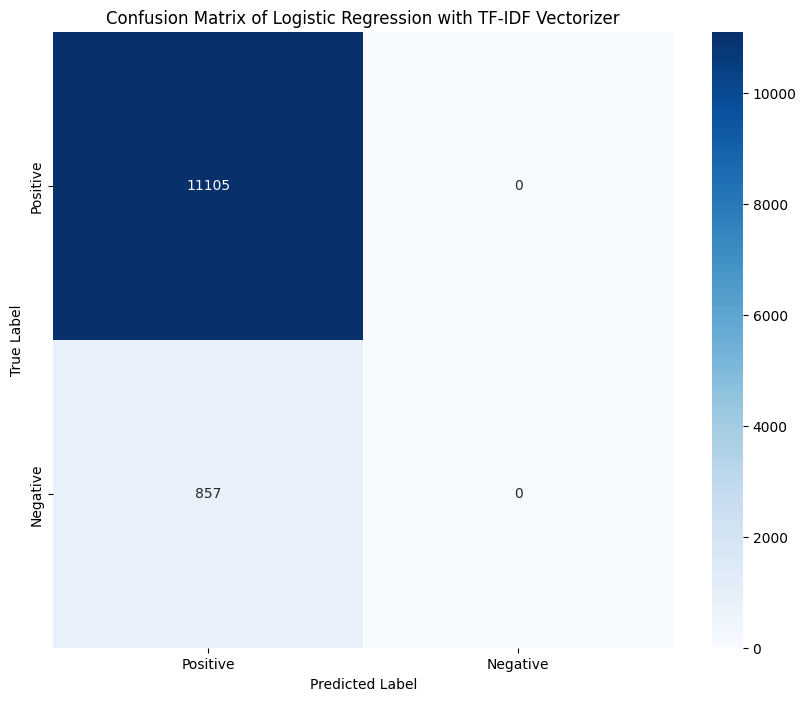

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of Logistic Regression with TF-IDF Vectorizer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Deep Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
stopwords = set(stopwords.words('english'))
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import os
from tqdm import tqdm
tqdm.pandas()
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_csv("/content/train_tweet.csv")
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
# def transform_label(label):
#     return 1 if label == 'positive' else 0
# data['label'] = data['sentiment'].progress_apply(transform_label)
# data.head()

100%|██████████| 50000/50000 [00:00<00:00, 397879.65it/s]


,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [ ]:

data['token_length'] = data.tweet.progress_apply(lambda x: len(x.split()))
data_pos = data[data['label'] == 1]
data_pos['token_length'].describe()

100%|██████████| 31962/31962 [00:00<00:00, 347510.28it/s]


count    2242.000000
mean       14.053078
std         4.950747
min         3.000000
25%        10.000000
50%        14.000000
75%        17.000000
max        30.000000
Name: token_length, dtype: float64

In [ ]:
data_neg = data[data['label'] == 0]
data_neg['token_length'].describe()

count    29720.000000
mean        13.091252
std          5.510082
min          3.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         34.000000
Name: token_length, dtype: float64

<Figure size 500x800 with 0 Axes>

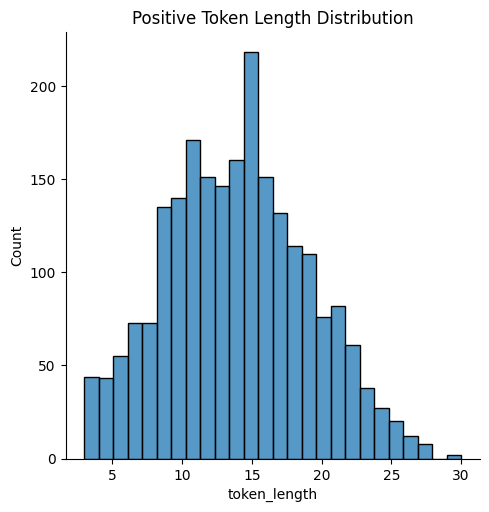

In [ ]:
plt.figure(figsize=(5, 8))
sns.displot(data_pos, x='token_length')
plt.title('Positive Token Length Distribution')
plt.show()

<Figure size 500x800 with 0 Axes>

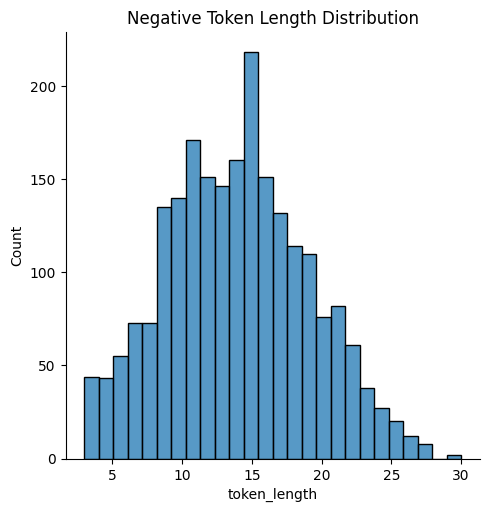

In [ ]:
plt.figure(figsize=(5, 8))
sns.displot(data_pos, x='token_length')
plt.title('Negative Token Length Distribution')
plt.show()

In [ ]:
def rm_link(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)
def rm_punct2(text):
    return re.sub(r'[\"\#\$\%\&\'\(\)\*\+\/\:\;\<\=\>\@\[\\\]\^\_\`\{\|\}\~]', ' ', text)
def rm_html(text):
    return re.sub(r'<[^>]+>', '', text)
def space_bt_punct(text):
    pattern = r'([.,!?-])'
    s = re.sub(pattern, r' \1 ', text)
    s = re.sub(r'\s{2,}', ' ', s)
    return s
def rm_number(text):
    return re.sub(r'\d+', '', text)
def rm_whitespaces(text):
    return re.sub(r' +', ' ', text)
def rm_nonascii(text):
    return re.sub(r'[^\x00-\x7f]', r'', text)
def rm_emoji(text):
    emojis = re.compile(
        '['
        u'\U0001F600-\U0001F64F'
        u'\U0001F300-\U0001F5FF'
        u'\U0001F680-\U0001F6FF'
        u'\U0001F1E0-\U0001F1FF'
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE
    )
    return emojis.sub(r'', text)
def spell_correction(text):
    return re.sub(r'(.)\1+', r'\1\1', text)
def clean_pipeline(text):
    no_link = rm_link(text)
    no_html = rm_html(no_link)
    space_punct = space_bt_punct(no_html)
    no_punct = rm_punct2(space_punct)
    no_number = rm_number(no_punct)
    no_whitespaces = rm_whitespaces(no_number)
    no_nonasci = rm_nonascii(no_whitespaces)
    no_emoji = rm_emoji(no_nonasci)
    spell_corrected = spell_correction(no_emoji)
    return spell_corrected

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def tokenize(text):
    return word_tokenize(text)
def rm_stopwords(text):
    return [i for i in text if i not in stopwords]
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmas = [lemmatizer.lemmatize(t) for t in text]
    return rm_stopwords(lemmas)
def preprocess_pipeline(text):
    tokens = tokenize(text)
    no_stopwords = rm_stopwords(tokens)
    lemmas = lemmatize(no_stopwords)
    return ' '.join(lemmas)

In [ ]:
data['clean'] = data['tweet'].progress_apply(clean_pipeline)
data['processed'] = data['clean'].progress_apply(preprocess_pipeline)
data.head()

100%|██████████| 31962/31962 [00:15<00:00, 2118.38it/s]


,id,label,tweet,token_length,clean,processed
0,1,0,@user when a father is dysfunctional and is s...,18,user when a father is dysfunctional and is so...,user father dysfunctional selfish drag kid dys...
1,2,0,@user @user thanks for #lyft credit i can't us...,19,user user thanks for lyft credit i can t use ...,user user thanks lyft credit use cause offer w...
2,3,0,bihday your majesty,3,bihday your majesty,bihday majesty
3,4,0,#model i love u take with u all the time in ...,14,model i love u take with u all the time in ur...,model love u take u time ur ! ! !
4,5,0,factsguide: society now #motivation,4,factsguide society now motivation,factsguide society motivation


In [ ]:
data[['processed', 'label']].to_csv('Tweet_cleaned.csv', index=False, header=True)

In [ ]:
reviews = data.processed.values
words = ' '.join(reviews)
words = words.split()
words[:10]

['user',
 'father',
 'dysfunctional',
 'selfish',
 'drag',
 'kid',
 'dysfunction',
 '.',
 'run',
 'user']

Adding pad token

In [ ]:
counter = Counter(words)
vocab = sorted(counter, key=counter.get, reverse=True)
int2word = dict(enumerate(vocab, 1))
int2word[0] = '<PAD>'
word2int = {word: id for id, word in int2word.items()}

In [ ]:
reviews_enc = [[word2int[word] for word in review.split()] for review in tqdm(reviews)]
for i in range(5):
    print(reviews_enc[i][:5])

100%|██████████| 31962/31962 [00:00<00:00, 212174.03it/s]

[2, 18, 13613, 2434, 3246]
[2, 2, 99, 4965, 2069]
[23, 2989]
[79, 7, 10, 31, 10]
[2606, 1120, 217]


In [ ]:
word2int['data']

1462

In [ ]:
def pad_features(reviews, pad_id, seq_length=128):
    features = np.full((len(reviews), seq_length), pad_id, dtype=int)
    for i, row in enumerate(reviews):
        features[i, :len(row)] = np.array(row)[:seq_length]
    return features
seq_length = 256
features = pad_features(reviews_enc, pad_id=word2int['<PAD>'], seq_length=seq_length)
assert len(features) == len(reviews_enc)
assert len(features[0]) == seq_length
features[:10, :10]

array([[    2,    18, 13613,  2434,  3246,   125,  6989,     1,   322,
            0],
       [    2,     2,    99,  4965,  2069,   339,   516,  1058,  6990,
         3868],
       [   23,  2989,     0,     0,     0,     0,     0,     0,     0,
            0],
       [   79,     7,    10,    31,    10,    12,    61,     3,     3,
            3],
       [ 2606,  1120,   217,     0,     0,     0,     0,     0,     0,
            0],
       [  905,   236,  4966,   180,   600,   288,     1,  3518,   108,
        13615],
       [    2,  1895,    63,     2,     2,     2,     2,     2,     2,
            2],
       [   85,   149,    43,    43,  1030,     1,    67,   149,  1030,
          133],
       [    3,     3,     3,     7,  1092,     3,     3,     3,  5786,
         1007],
       [    2,     2,   620,     3,  2798,     3,     0,     0,     0,
            0]])

In [ ]:
labels = data.label.to_numpy()
labels

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_size = 0.7
val_size = 0.5
split_id = int(len(features) * train_size)
train_x, remain_x = features[:split_id], features[split_id:]
train_y, remain_y = labels[:split_id], labels[split_id:]
split_val_id = int(len(remain_x) * val_size)
val_x, test_x = remain_x[:split_val_id], remain_x[split_val_id:]
val_y, test_y = remain_y[:split_val_id], remain_y[split_val_id:]
print('Feature Shapes:')
print('Train set: {}'.format(train_x.shape))
print('Validation set: {}'.format(val_x.shape))
print('Test set: {}'.format(test_x.shape))

Feature Shapes:
Train set: (22373, 256)
Validation set: (4794, 256)
Test set: (4795, 256)


In [ ]:
print(len(train_y[train_y == 0]), len(train_y[train_y == 1]))
print(len(val_y[val_y == 0]), len(val_y[val_y == 1]))
print(len(test_y[test_y == 0]), len(test_y[test_y == 1]))

20812 1561
4453 341
4455 340


In [ ]:
batch_size = 128
trainset = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
validset = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
testset = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
trainloader = DataLoader(trainset, shuffle=True, batch_size=batch_size)
valloader = DataLoader(validset, shuffle=True, batch_size=batch_size)
testloader = DataLoader(testset, shuffle=True, batch_size=batch_size)

In [ ]:

x, y = next(iter(trainloader))
print('Sample batch size: ', x.size())
print('Sample batch input: \n', x)
print()
print('Sample label size: ', y.size())
print('Sample label input: \n', y)

Sample batch size:  torch.Size([128, 256])
Sample batch input: 
 tensor([[   77,   368,  5302,  ...,     0,     0,     0],
        [   17,  7691,   172,  ...,     0,     0,     0],
        [    2,     2,  8676,  ...,     0,     0,     0],
        ...,
        [ 1068, 12328,   100,  ...,     0,     0,     0],
        [    2,  1110,  3111,  ...,     0,     0,     0],
        [  199,    99,   130,  ...,     0,     0,     0]])

Sample label size:  torch.Size([128])
Sample label input: 
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0])


## SentimentModel

In [ ]:
class SentimentModel(nn.Module):
    def __init__(self, vocab_size, output_size, hidden_size=128, embedding_size=400, n_layers=2, dropout=0.2):
        super(SentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_size)
        self.lstm = nn.LSTM(embedding_size, hidden_size, n_layers, dropout=dropout, batch_first=True)
        self.dropout = nn.Dropout(0.3)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = x.long()
        x = self.embedding(x)
        o, _ =  self.lstm(x)
        o = o[:, -1, :]
        o = self.dropout(o)
        o = self.fc(o)
        o = self.sigmoid(o)
        return o

In [ ]:
! pip install torchinfo

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [ ]:
from torchinfo import summary

In [ ]:
vocab_size

35125

In [ ]:
vocab_size = 121301
output_size = 1
embedding_size = 30
hidden_size = 16
n_layers = 2
dropout=0.25
model = SentimentModel(vocab_size, output_size, hidden_size, embedding_size, n_layers, dropout)
print(model)

SentimentModel(
  (embedding): Embedding(121301, 30)
  (lstm): LSTM(30, 16, num_layers=2, batch_first=True, dropout=0.25)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=16, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [ ]:
summary(model, x.size())

Layer (type:depth-idx)                   Output Shape              Param #
SentimentModel                           [128, 1]                  --
├─Embedding: 1-1                         [128, 256, 30]            3,639,030
├─LSTM: 1-2                              [128, 256, 16]            5,248
├─Dropout: 1-3                           [128, 16]                 --
├─Linear: 1-4                            [128, 1]                  17
├─Sigmoid: 1-5                           [128, 1]                  --
Total params: 3,644,295
Trainable params: 3,644,295
Non-trainable params: 0
Total mult-adds (M): 637.76
Input size (MB): 0.13
Forward/backward pass size (MB): 12.06
Params size (MB): 14.58
Estimated Total Size (MB): 26.77

## LSTM training

In [ ]:
lr = 0.001
criterion = nn.BCELoss()
optim = Adam(model.parameters(), lr=lr)
grad_clip = 5
epochs = 20
print_every = 1
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'epochs': epochs
}
es_limit = 5

In [ ]:
model = model.to(device)
epochloop = tqdm(range(epochs), position=0, desc='Training', leave=True)
es_trigger = 0
val_loss_min = torch.inf
for e in epochloop:
    model.train()
    train_loss = 0
    train_acc = 0
    for id, (feature, target) in enumerate(trainloader):
        epochloop.set_postfix_str(f'Training batch {id}/{len(trainloader)}')
        feature, target = feature.to(device), target.to(device)
        optim.zero_grad()
        out = model(feature)
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        equals = predicted == target
        acc = torch.mean(equals.type(torch.FloatTensor))
        train_acc += acc.item()
        loss = criterion(out.squeeze(), target.float())
        train_loss += loss.item()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
        optim.step()
        del feature, target, predicted
    history['train_loss'].append(train_loss / len(trainloader))
    history['train_acc'].append(train_acc / len(trainloader))
    model.eval()
    val_loss = 0
    val_acc = 0
    with torch.no_grad():
        for id, (feature, target) in enumerate(valloader):
            epochloop.set_postfix_str(f'Validation batch {id}/{len(valloader)}')
            feature, target = feature.to(device), target.to(device)
            out = model(feature)
            predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
            equals = predicted == target
            acc = torch.mean(equals.type(torch.FloatTensor))
            val_acc += acc.item()
            loss = criterion(out.squeeze(), target.float())
            val_loss += loss.item()
            del feature, target, predicted
        history['val_loss'].append(val_loss / len(valloader))
        history['val_acc'].append(val_acc / len(valloader))
    model.train()
    epochloop.set_postfix_str(f'Val Loss: {val_loss / len(valloader):.3f} | Val Acc: {val_acc / len(valloader):.3f}')
    if (e+1) % print_every == 0:
        epochloop.write(f'Epoch {e+1}/{epochs} | Train Loss: {train_loss / len(trainloader):.3f} Train Acc: {train_acc / len(trainloader):.3f} | Val Loss: {val_loss / len(valloader):.3f} Val Acc: {val_acc / len(valloader):.3f}')
        epochloop.update()
    if val_loss / len(valloader) <= val_loss_min:
        torch.save(model.state_dict(), './sentiment_lstm.pt')
        val_loss_min = val_loss / len(valloader)
        es_trigger = 0
    else:
        epochloop.write(f'[WARNING] Validation loss did not improved ({val_loss_min:.3f} --> {val_loss / len(valloader):.3f})')
        es_trigger += 1
    if es_trigger >= es_limit:
        epochloop.write(f'Early stopped at Epoch-{e+1}')
        history['epochs'] = e+1
        break

Training:  10%|█         | 2/20 [00:41<12:22, 41.26s/it, Training batch 0/175]            

Epoch 1/20 | Train Loss: 0.361 Train Acc: 0.880 | Val Loss: 0.257 Val Acc: 0.929


Training:  20%|██        | 4/20 [01:20<06:43, 25.25s/it, Training batch 0/175]            

Epoch 2/20 | Train Loss: 0.261 Train Acc: 0.930 | Val Loss: 0.259 Val Acc: 0.928
[WARNING] Validation loss did not improved (0.257 --> 0.259)


Training:  25%|██▌       | 5/20 [02:01<05:43, 22.89s/it, Training batch 0/175]            

Epoch 3/20 | Train Loss: 0.261 Train Acc: 0.930 | Val Loss: 0.257 Val Acc: 0.929


Training:  35%|███▌      | 7/20 [02:42<05:58, 27.59s/it, Training batch 0/175]            

Epoch 4/20 | Train Loss: 0.260 Train Acc: 0.930 | Val Loss: 0.258 Val Acc: 0.928
[WARNING] Validation loss did not improved (0.257 --> 0.258)


Training:  40%|████      | 8/20 [03:22<04:52, 24.40s/it, Training batch 0/175]            

Epoch 5/20 | Train Loss: 0.260 Train Acc: 0.930 | Val Loss: 0.257 Val Acc: 0.929
[WARNING] Validation loss did not improved (0.257 --> 0.257)


Training:  45%|████▌     | 9/20 [04:01<05:06, 27.87s/it, Training batch 0/175]            

Epoch 6/20 | Train Loss: 0.261 Train Acc: 0.930 | Val Loss: 0.257 Val Acc: 0.929
[WARNING] Validation loss did not improved (0.257 --> 0.257)


Training:  55%|█████▌    | 11/20 [04:42<04:40, 31.22s/it, Training batch 0/175]            

Epoch 7/20 | Train Loss: 0.260 Train Acc: 0.930 | Val Loss: 0.256 Val Acc: 0.929


Training:  60%|██████    | 12/20 [05:31<03:47, 28.41s/it, Training batch 0/175]            

Epoch 8/20 | Train Loss: 0.260 Train Acc: 0.930 | Val Loss: 0.258 Val Acc: 0.928
[WARNING] Validation loss did not improved (0.256 --> 0.258)


Training:  65%|██████▌   | 13/20 [06:10<03:34, 30.63s/it, Training batch 0/175]            

Epoch 9/20 | Train Loss: 0.260 Train Acc: 0.930 | Val Loss: 0.257 Val Acc: 0.929
[WARNING] Validation loss did not improved (0.256 --> 0.257)


Training:  70%|███████   | 14/20 [06:52<03:21, 33.52s/it, Training batch 0/175]            

Epoch 10/20 | Train Loss: 0.260 Train Acc: 0.930 | Val Loss: 0.257 Val Acc: 0.929
[WARNING] Validation loss did not improved (0.256 --> 0.257)


Training:  80%|████████  | 16/20 [07:30<02:19, 34.82s/it, Training batch 0/175]            

Epoch 11/20 | Train Loss: 0.260 Train Acc: 0.930 | Val Loss: 0.257 Val Acc: 0.929
[WARNING] Validation loss did not improved (0.256 --> 0.257)


Training:  55%|█████▌    | 11/20 [08:12<06:42, 44.77s/it, Val Loss: 0.257 | Val Acc: 0.929]

Epoch 12/20 | Train Loss: 0.259 Train Acc: 0.930 | Val Loss: 0.257 Val Acc: 0.929
[WARNING] Validation loss did not improved (0.256 --> 0.257)
Early stopped at Epoch-12


In [ ]:
model.eval()
test_loss = 0
test_acc = 0
all_target = []
all_predicted = []
testloop = tqdm(testloader, leave=True, desc='Inference')
with torch.no_grad():
    for feature, target in testloop:
        feature, target = feature.to(device), target.to(device)
        out = model(feature)
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        equals = predicted == target
        acc = torch.mean(equals.type(torch.FloatTensor))
        test_acc += acc.item()
        loss = criterion(out.squeeze(), target.float())
        test_loss += loss.item()
        all_target.extend(target.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())
    print(f'Accuracy: {test_acc/len(testloader):.4f}, Loss: {test_loss/len(testloader):.4f}')

Inference: 100%|██████████| 38/38 [00:01<00:00, 19.53it/s]

Accuracy: 0.9291, Loss: 0.2559


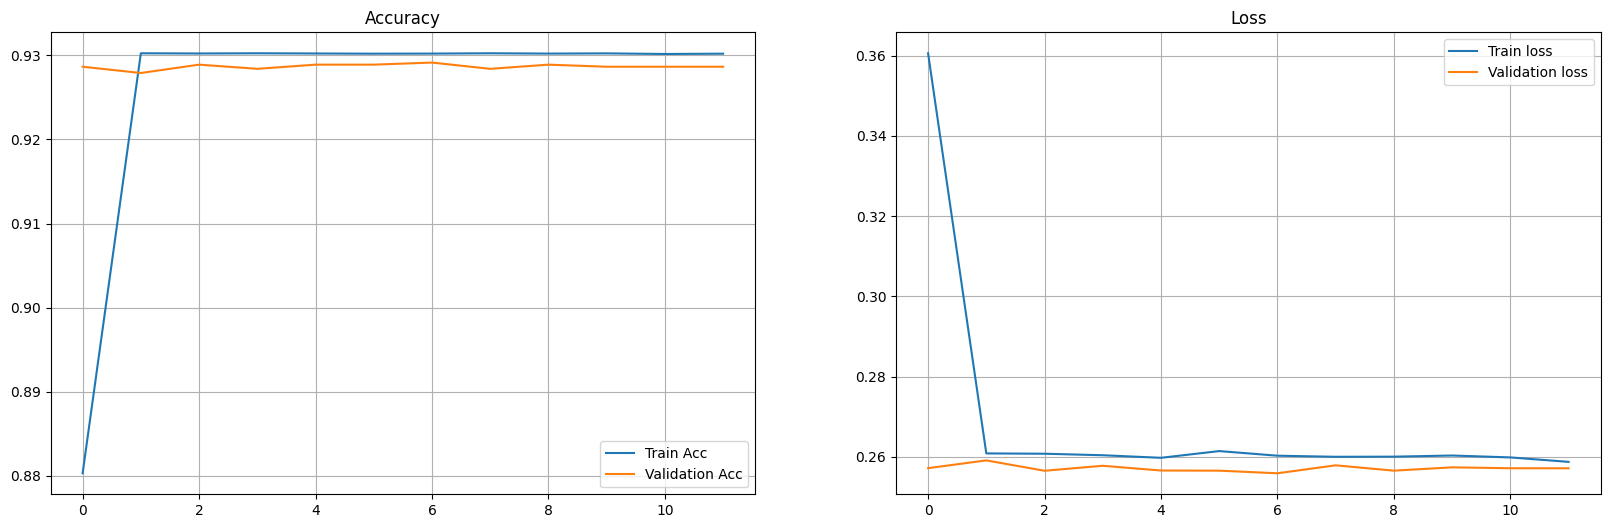

In [ ]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(history['train_acc'], label='Train Acc')
plt.plot(history['val_acc'], label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history['train_loss'], label='Train loss')
plt.plot(history['val_loss'], label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

In [ ]:
print(classification_report(all_predicted, all_target))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      4795
           1       0.00      0.00      0.00         0

    accuracy                           0.93      4795
   macro avg       0.50      0.46      0.48      4795
weighted avg       1.00      0.93      0.96      4795



In [ ]:
cm = confusion_matrix(all_predicted, all_target)

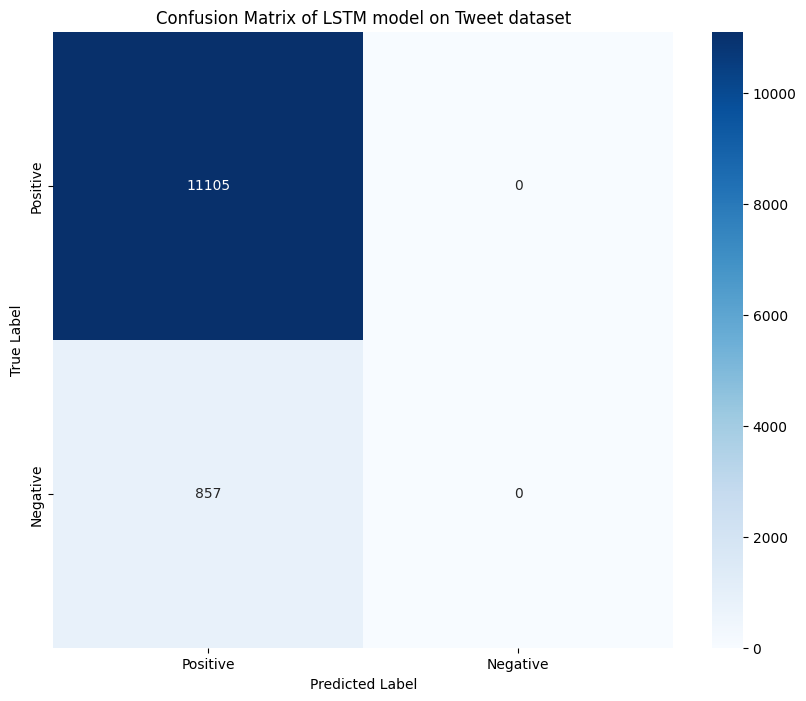

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of LSTM model on Tweet dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## LSTM-Attention

In [ ]:
class Attention(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.attn = nn.Linear(hidden_dim, 1, bias=False)

    def forward(self, lstm_output):
        # lstm_output = [batch size, seq_len, hidden_dim]
        attention_scores = self.attn(lstm_output)
        # attention_scores = [batch size, seq_len, 1]
        attention_scores = attention_scores.squeeze(2)
        # attention_scores = [batch size, seq_len]
        return F.softmax(attention_scores, dim=1)

In [ ]:
class LSTM_ATT(nn.Module):
    def __init__(
        self,
        vocab_size,
        embedding_dim=128,
        hidden_dim=256,
        output_dim=1,
        n_layers=2,
        bidirectional=True,
        dropout=0.1,
    ):
        super(LSTM_ATT,self).__init__()


        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim)


        # attention
        self.attention = Attention(hidden_dim * 2 if bidirectional else hidden_dim)


        # LSTM layer
        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers=n_layers,
            bidirectional=bidirectional,
            dropout=dropout,
            batch_first=True,
        )


        # Dense layer
        # self.fc = nn.Sequential(
        #     nn.Linear(hidden_dim * 2, hidden_dim),
        #     nn.ReLU(),
        #     nn.Linear(hidden_dim, output_dim),
        # )
        self.fc1 = nn.Linear(hidden_dim * 2, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)



        # Activation function
        self.act = nn.Sigmoid()


    def forward(self, text):
        text  = text.long()

        # text = [batch size, sent_length]
        embedded = self.embedding(text)
        lstm_output, (hidden, _) = self.lstm(embedded)
        # lstm_output = [batch size, seq_len, hidden_dim*num_directions]
        # concat the final forward and backward hidden state
        hidden = torch.cat((hidden[-2, :, :], hidden[-1, :, :]), dim=1)
        attention_weights = self.attention(lstm_output)
        # attention_weights = [batch size, seq_len]
        attention_weights = attention_weights.unsqueeze(2)
        weighted = lstm_output * attention_weights
        # weighted = [batch size, seq_len, hidden_dim]


        weighted_sum = weighted.sum(dim=1)
        # weighted_sum = [batch size, hidden_dim]


        out = self.fc1(weighted_sum)
        out = self.relu(out)
        out = self.fc2(out)

        # dense_outputs = [batch size, output_dim]


        # Final activation function
        outputs = self.act(out)


        return outputs

In [ ]:
import torch.nn.functional as F

In [ ]:
vocab_size = 35125

output_size = 1
embedding_size = 30
hidden_size = 16
n_layers = 2
dropout=0.25

In [ ]:
lstm_att = LSTM_ATT(vocab_size=vocab_size, embedding_dim=embedding_size, hidden_dim=hidden_size, n_layers=n_layers, dropout=dropout)
lstm_att.eval()

LSTM_ATT(
  (embedding): Embedding(35125, 30)
  (attention): Attention(
    (attn): Linear(in_features=32, out_features=1, bias=False)
  )
  (lstm): LSTM(30, 16, num_layers=2, batch_first=True, dropout=0.25, bidirectional=True)
  (fc1): Linear(in_features=32, out_features=16, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=16, out_features=1, bias=True)
  (act): Sigmoid()
)

In [ ]:
summary(lstm_att, x.size())

Layer (type:depth-idx)                   Output Shape              Param #
LSTM_ATT                                 [128, 1]                  --
├─Embedding: 1-1                         [128, 256, 30]            1,053,750
├─LSTM: 1-2                              [128, 256, 32]            12,544
├─Attention: 1-3                         [128, 256]                --
│    └─Linear: 2-1                       [128, 256, 1]             32
├─Linear: 1-4                            [128, 16]                 528
├─ReLU: 1-5                              [128, 16]                 --
├─Linear: 1-6                            [128, 1]                  17
├─Sigmoid: 1-7                           [128, 1]                  --
Total params: 1,066,871
Trainable params: 1,066,871
Non-trainable params: 0
Total mult-adds (M): 546.00
Input size (MB): 0.13
Forward/backward pass size (MB): 16.53
Params size (MB): 4.27
Estimated Total Size (MB): 20.93

In [ ]:
lr = 0.001
criterion = nn.BCELoss()
optim = Adam(lstm_att.parameters(), lr=lr)
grad_clip = 5
epochs = 20
print_every = 1
history = {
    'train_loss': [],
    'train_acc': [],
    'val_loss': [],
    'val_acc': [],
    'epochs': epochs
}
es_limit = 5

In [ ]:
model = lstm_att.to(device)
epochloop = tqdm(range(epochs), position=0, desc='Training', leave=True)
es_trigger = 0
val_loss_min = torch.inf
for e in epochloop:
    model.train()
    train_loss = 0
    train_acc = 0
    for id, (feature, target) in enumerate(trainloader):
        epochloop.set_postfix_str(f'Training batch {id}/{len(trainloader)}')
        feature, target = feature.to(device), target.to(device)
        optim.zero_grad()
        out = model(feature)
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        equals = predicted == target
        acc = torch.mean(equals.type(torch.FloatTensor))
        train_acc += acc.item()
        loss = criterion(out.squeeze(), target.float())
        train_loss += loss.item()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
        optim.step()
        del feature, target, predicted
    history['train_loss'].append(train_loss / len(trainloader))
    history['train_acc'].append(train_acc / len(trainloader))
    model.eval()
    val_loss = 0
    val_acc = 0
    with torch.no_grad():
        for id, (feature, target) in enumerate(valloader):
            epochloop.set_postfix_str(f'Validation batch {id}/{len(valloader)}')
            feature, target = feature.to(device), target.to(device)
            out = model(feature)
            predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
            equals = predicted == target
            acc = torch.mean(equals.type(torch.FloatTensor))
            val_acc += acc.item()
            loss = criterion(out.squeeze(), target.float())
            val_loss += loss.item()
            del feature, target, predicted
        history['val_loss'].append(val_loss / len(valloader))
        history['val_acc'].append(val_acc / len(valloader))
    model.train()
    epochloop.set_postfix_str(f'Val Loss: {val_loss / len(valloader):.3f} | Val Acc: {val_acc / len(valloader):.3f}')
    if (e+1) % print_every == 0:
        epochloop.write(f'Epoch {e+1}/{epochs} | Train Loss: {train_loss / len(trainloader):.3f} Train Acc: {train_acc / len(trainloader):.3f} | Val Loss: {val_loss / len(valloader):.3f} Val Acc: {val_acc / len(valloader):.3f}')
        epochloop.update()
    if val_loss / len(valloader) <= val_loss_min:
        torch.save(model.state_dict(), './sentiment_lstm.pt')
        val_loss_min = val_loss / len(valloader)
        es_trigger = 0
    else:
        epochloop.write(f'[WARNING] Validation loss did not improved ({val_loss_min:.3f} --> {val_loss / len(valloader):.3f})')
        es_trigger += 1
    if es_trigger >= es_limit:
        epochloop.write(f'Early stopped at Epoch-{e+1}')
        history['epochs'] = e+1
        break

Training:  10%|█         | 2/20 [01:10<21:13, 70.72s/it, Training batch 0/175]            

Epoch 1/20 | Train Loss: 0.340 Train Acc: 0.901 | Val Loss: 0.257 Val Acc: 0.929


Training:  20%|██        | 4/20 [02:19<11:43, 43.98s/it, Training batch 0/175]            

Epoch 2/20 | Train Loss: 0.253 Train Acc: 0.930 | Val Loss: 0.255 Val Acc: 0.929


Training:  25%|██▌       | 5/20 [03:28<09:45, 39.04s/it, Training batch 0/175]            

Epoch 3/20 | Train Loss: 0.205 Train Acc: 0.934 | Val Loss: 0.178 Val Acc: 0.936


Training:  35%|███▌      | 7/20 [04:38<10:13, 47.23s/it, Training batch 0/175]            

Epoch 4/20 | Train Loss: 0.138 Train Acc: 0.953 | Val Loss: 0.157 Val Acc: 0.942


Training:  40%|████      | 8/20 [05:46<08:18, 41.58s/it, Training batch 0/175]            

Epoch 5/20 | Train Loss: 0.109 Train Acc: 0.962 | Val Loss: 0.159 Val Acc: 0.941
[WARNING] Validation loss did not improved (0.157 --> 0.159)


Training:  45%|████▌     | 9/20 [06:55<08:48, 48.07s/it, Training batch 0/175]            

Epoch 6/20 | Train Loss: 0.091 Train Acc: 0.969 | Val Loss: 0.152 Val Acc: 0.944


Training:  55%|█████▌    | 11/20 [08:04<07:59, 53.29s/it, Training batch 0/175]            

Epoch 7/20 | Train Loss: 0.074 Train Acc: 0.975 | Val Loss: 0.160 Val Acc: 0.947
[WARNING] Validation loss did not improved (0.152 --> 0.160)


Training:  60%|██████    | 12/20 [09:14<06:04, 45.60s/it, Training batch 0/175]            

Epoch 8/20 | Train Loss: 0.062 Train Acc: 0.979 | Val Loss: 0.180 Val Acc: 0.944
[WARNING] Validation loss did not improved (0.152 --> 0.180)


Training:  65%|██████▌   | 13/20 [10:22<05:56, 50.87s/it, Training batch 0/175]            

Epoch 9/20 | Train Loss: 0.051 Train Acc: 0.983 | Val Loss: 0.186 Val Acc: 0.943
[WARNING] Validation loss did not improved (0.152 --> 0.186)


Training:  70%|███████   | 14/20 [11:32<05:33, 55.54s/it, Training batch 0/175]            

Epoch 10/20 | Train Loss: 0.041 Train Acc: 0.987 | Val Loss: 0.210 Val Acc: 0.943
[WARNING] Validation loss did not improved (0.152 --> 0.210)


Training:  50%|█████     | 10/20 [12:41<12:41, 76.18s/it, Val Loss: 0.203 | Val Acc: 0.948]

Epoch 11/20 | Train Loss: 0.034 Train Acc: 0.991 | Val Loss: 0.203 Val Acc: 0.948
[WARNING] Validation loss did not improved (0.152 --> 0.203)
Early stopped at Epoch-11


In [ ]:
model.eval()
test_loss = 0
test_acc = 0
all_target = []
all_predicted = []
testloop = tqdm(testloader, leave=True, desc='Inference')
with torch.no_grad():
    for feature, target in testloop:
        feature, target = feature.to(device), target.to(device)
        out = model(feature)
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        equals = predicted == target
        acc = torch.mean(equals.type(torch.FloatTensor))
        test_acc += acc.item()
        loss = criterion(out.squeeze(), target.float())
        test_loss += loss.item()
        all_target.extend(target.cpu().numpy())
        all_predicted.extend(predicted.cpu().numpy())
    print(f'Accuracy: {test_acc/len(testloader):.4f}, Loss: {test_loss/len(testloader):.4f}')

Inference: 100%|██████████| 38/38 [00:04<00:00,  9.28it/s]

Accuracy: 0.9520, Loss: 0.1824


In [ ]:
cm = confusion_matrix(all_predicted, all_target)

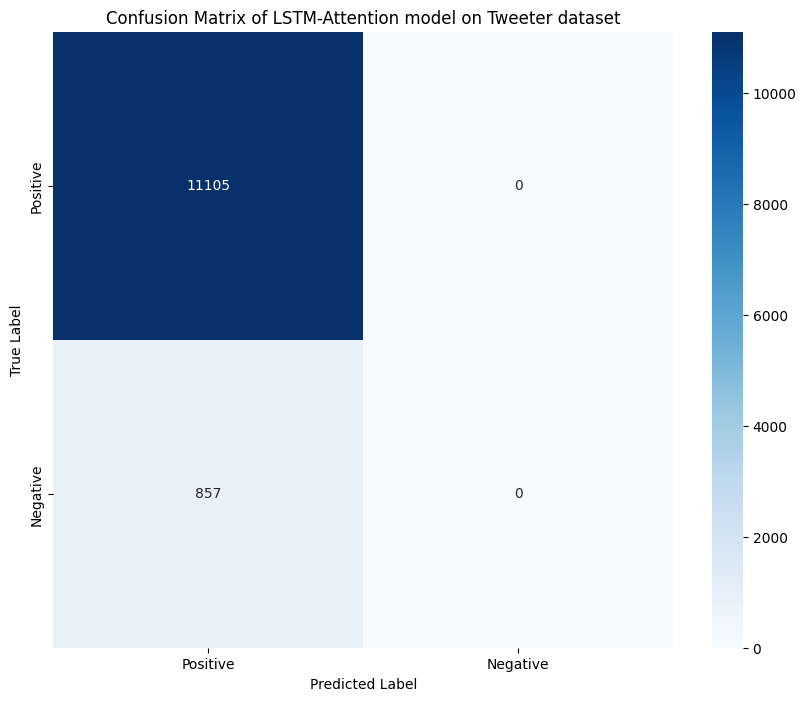

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


plt.figure(figsize=(10, 8))
sns.heatmap(cm_tfidf, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', "Negative"], yticklabels=['Positive', "Negative"])
plt.title(f'Confusion Matrix of LSTM-Attention model on Tweeter dataset')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Inference

In [ ]:
reviews_enc = [[word2int[word] for word in review.split()] for review in tqdm(reviews)]

100%|██████████| 31962/31962 [00:00<00:00, 213957.26it/s]


In [ ]:
def preprocess_pipeline(text):
    tokens = tokenize(text)
    no_stopwords = rm_stopwords(tokens)
    lemmas = lemmatize(no_stopwords)
    return ' '.join(lemmas)

In [ ]:
text = """
My first exposure to the Templarios & not a good one. I was excited to find this title among the offerings from Anchor Bay Video, which has brought us other cult classics such as "Spider Baby". The print quality is excellent, but this alone can't hide the fact that the film is deadly dull. There's a thrilling opening sequence in which the villagers exact a terrible revenge on the Templars (& set the whole thing in motion), but everything else in the movie is slow, ponderous &, ultimately, unfulfilling. Adding insult to injury: the movie was dubbed, not subtitled, as promised on the video jacket.
"""

In [ ]:
word_seq = np.array([[word2int[preprocess_pipeline(word)]  for word in text.split() if preprocess_pipeline(word) in word2int.keys()]])

In [ ]:
word_seq

array([[47900, 35672,  2298, 10325,  7351,   649,  2410,     5,   691,
           55,  1854,  1469,   892,   701,  5115, 55934,  2416,  1991,
           52,  1442,   498,  1745,  1108,  2276,   251,   458]])

In [ ]:
def pad_features(reviews, pad_id, seq_length=128):
    features = np.full((len(reviews), seq_length), pad_id, dtype=int)
    for i, row in enumerate(reviews):
        features[i, :len(row)] = np.array(row)[:seq_length]
    return features
seq_length = 256
features = pad_features(word_seq, pad_id=word2int['<PAD>'], seq_length=seq_length)

In [ ]:
features

array([[   50, 12828,    22,   161,   103,  1707,  2444,  4927,  1664,
           10,  6506,  1734,  1625,  1335,   372,  2250,   365,   554,
         7224,  7382,   934,  8414,  6213,  1348,  3396,   446,   574,
           51,   272,   425,   292,  2634,   292,  4808,   142,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
      

In [ ]:
def predict_text(model, text, seq_length):
        word_seq = np.array([word2int[preprocess_pipeline(word)]  for word in text.split() if preprocess_pipeline(word) in word2int.keys()])
        word_seq = np.expand_dims(word_seq,axis=0)
        pad =  torch.from_numpy(pad_features(word_seq, pad_id=word2int['<PAD>'], seq_length=seq_length))
        inputs = pad.to(device)
        out = model(inputs)
        predicted = torch.tensor([1 if i == True else 0 for i in out > 0.5], device=device)
        return(predicted.item())

In [ ]:
predict_text(model, text, seq_length)

0

In [ ]:
print(text)
print('='*70)
print(f'Actual sentiment is  : negative')
print('='*70)
pro = predict_text(model,text, seq_length)
status = "positive" if pro > 0.5 else "negative"
pro = (1 - pro) if status == "negative" else pro
print(f'Predicted sentiment is {status}')


My first exposure to the Templarios & not a good one. I was excited to find this title among the offerings from Anchor Bay Video, which has brought us other cult classics such as "Spider Baby". The print quality is excellent, but this alone can't hide the fact that the film is deadly dull. There's a thrilling opening sequence in which the villagers exact a terrible revenge on the Templars (& set the whole thing in motion), but everything else in the movie is slow, ponderous &, ultimately, unfulfilling. Adding insult to injury: the movie was dubbed, not subtitled, as promised on the video jacket.

Actual sentiment is  : negative
Predicted sentiment is negative


## plot bar

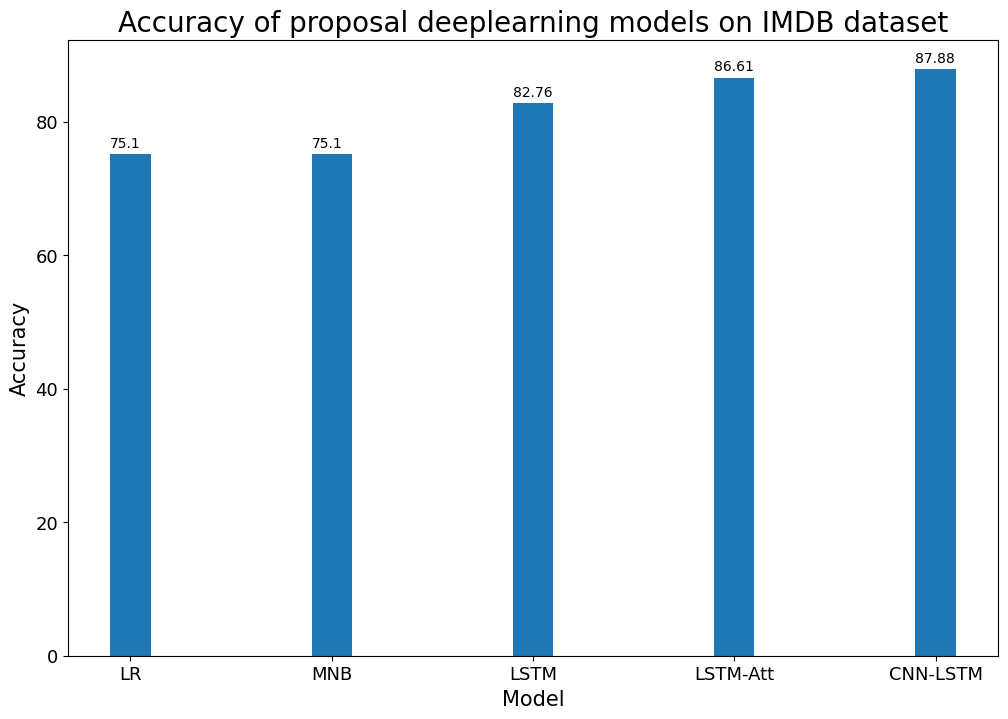

In [ ]:
plt.figure(figsize=(12, 8))
acc = [75.1, 75.1, 82.76, 86.61, 87.88]
idx = np.arange(len(acc))
plt.bar(idx, acc, width=0.2)
for i in range(len(acc)):
  plt.text(i-0.1, acc[i] + 1, f"{str(acc[i])}")

plt.title("Accuracy of proposal deeplearning models on IMDB dataset", fontsize=20)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(idx, ["LR", "MNB", "LSTM", "LSTM-Att", "CNN-LSTM"], fontsize=13)
plt.yticks(fontsize=13)
plt.show()

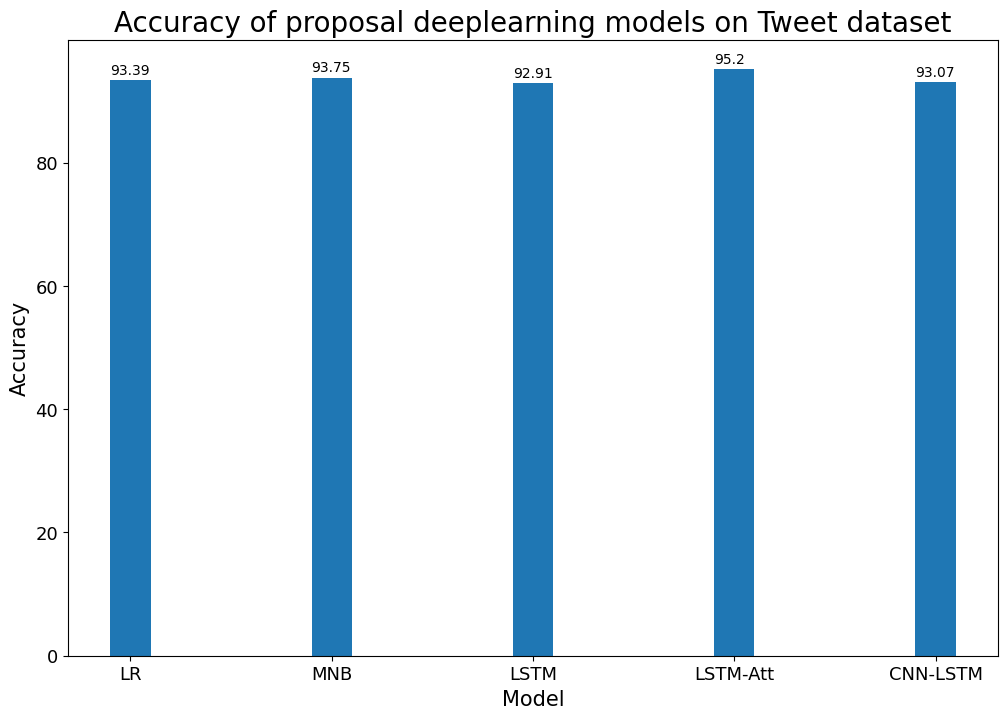

In [ ]:
plt.figure(figsize=(12, 8))
acc = [93.39, 93.75, 92.91, 95.20, 93.07]
idx = np.arange(len(acc))
plt.bar(idx, acc, width=0.2)
for i in range(len(acc)):
  plt.text(i-0.1, acc[i] + 1, f"{str(acc[i])}")

plt.title("Accuracy of proposal deeplearning models on Tweet dataset", fontsize=20)
plt.xlabel("Model", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(idx, ["LR", "MNB", "LSTM", "LSTM-Att", "CNN-LSTM"], fontsize=13)
plt.yticks(fontsize=13)
plt.show()